In [1]:
import folium
from folium.plugins import MarkerCluster, HeatMap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import spacy
import time

# Configurar pandas para mostrar todas las filas y columnas
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)
#pd.set_option('display.width', None)

# IPS ORIGEN

In [4]:
# Nombre del archivo de entrada
archivo_resultados = r"E:\Cursos\BC_Data_Science\Repositorio\ONLINE_DS_THEBRIDGE_V_NEW\proyecto EDA\TEXT\resultados_geolocalizacion_origen_lugares.txt"

# Leer el contenido del archivo de resultados
with open(archivo_resultados, 'r', encoding='utf-8') as file:
    contenido_resultados = file.readlines()

# Crear una lista para almacenar los datos
data = []

# Omitir la primera línea que contiene encabezados
for linea in contenido_resultados[1:]:
    # Dividir la línea en Longitud, Latitud e Info_Lugar
    partes = linea.strip().split('\t')
    
    if len(partes) == 3:
        longitud, latitud, info_lugar = partes
        data.append({
            'Longitud': float(longitud),
            'Latitud': float(latitud),
            'Info_Lugar': info_lugar
        })

# Crear un DataFrame a partir de la lista de datos
df_lugares_origen = pd.DataFrame(data)

# Mostrar el DataFrame
print(df_lugares_origen)



# Guardar el DataFrame en un nuevo archivo CSV
df_lugares_origen.to_csv('E:\E:\Cursos\BC_Data_Science\Repositorio\ONLINE_DS_THEBRIDGE_V_NEW\proyecto EDA\DATASETS\EXCEL\geo_lugares_origen.csv', index=False)


      Longitud    Latitud                                         Info_Lugar
0    29.555740  52.658705  83, Цэнтральная вуліца, Мольча, Чыркавіцкі сел...
1    21.874273 -82.797050                     Coordenadas en el mar u océano
2    35.554545  45.445429              República Autónoma de Crimea, Ucrania
3    26.230098  50.573701  Великоомелянська сільська громада, Рівненський...
4    26.190156  50.545351  Ільпінь, Здолбунівська міська громада, Рівненс...
..         ...        ...                                                ...
874 -47.739233 -65.901628                     Coordenadas en el mar u océano
875  35.575340  45.456724              República Autónoma de Crimea, Ucrania
876  33.303067  44.370377         Sebastopol, Южный федеральный округ, Rusia
877  35.567435  45.400936              República Autónoma de Crimea, Ucrania
878  48.779024   2.007804                     Coordenadas en el mar u océano

[879 rows x 3 columns]


In [5]:
df_lugares_origen=pd.read_csv(r"E:\Cursos\BC_Data_Science\Repositorio\ONLINE_DS_THEBRIDGE_V_NEW\proyecto EDA\DATASETS\EXCEL\geo_lugares_origen.csv")

In [6]:
df_lugares_origen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Longitud    879 non-null    float64
 1   Latitud     879 non-null    float64
 2   Info_Lugar  879 non-null    object 
dtypes: float64(2), object(1)
memory usage: 20.7+ KB


In [6]:
# convertimos info_lugares , analizando el texto con spcy, conocer el idioma y hacer una columna  Ciudad

# Cargar el modelo de lenguaje en español de spaCy
nlp = spacy.load("es_core_news_sm")

# Función para clasificar las entidades en una fila
def clasificar_entidades(fila):
    doc = nlp(fila['Info_Lugar'])
    ciudades = []
    paises = []
    
    for entidad in doc.ents:
        if entidad.label_ == 'LOC':# busca localizacion de una ciudad
            ciudades.append(entidad.text)
       

    return pd.Series({'Ciudad': ', '.join(ciudades)})

# Aplicar la función a cada fila del DataFrame
df_lugares_origen['Ciudad'] = df_lugares_origen.apply(clasificar_entidades, axis=1)

# Mostrar el DataFrame resultante
df_lugares_origen


,Longitud,Latitud,Info_Lugar,Ciudad
0,29.555740,52.658705,"83, Цэнтральная вуліца, Мольча, Чыркавіцкі сел...","Мольча, Чыркавіцкі сельскі Савет, Provincia de..."
1,21.874273,-82.797050,Coordenadas en el mar u océano,
2,35.554545,45.445429,"República Autónoma de Crimea, Ucrania",Ucrania
3,26.230098,50.573701,"Великоомелянська сільська громада, Рівненський...","Великоомелянська, Ucrania"
4,26.190156,50.545351,"Ільпінь, Здолбунівська міська громада, Рівненс...",Ucrania
...,...,...,...,...
874,-47.739233,-65.901628,Coordenadas en el mar u océano,
875,35.575340,45.456724,"República Autónoma de Crimea, Ucrania",Ucrania
876,33.303067,44.370377,"Sebastopol, Южный федеральный округ, Rusia","Sebastopol, Южный, Rusia"
877,35.567435,45.400936,"República Autónoma de Crimea, Ucrania",Ucrania


In [7]:
# Lista para almacenar índices de filas que cumplen con la condición
indices_a_eliminar = []

# Iterar sobre las filas del DataFrame
for index, row in df_lugares_origen.iterrows():
    # Verificar la condición en la columna 'Info_Lugares'
    if row['Info_Lugar'] == 'Coordenadas en el mar u océano':
        # Agregar el índice a la lista
        indices_a_eliminar.append(index)

# Eliminar las filas con los índices recopilados
df_lugares_origen.drop(indices_a_eliminar, inplace=True)

In [8]:
df_lugares_origen.info()

<class 'pandas.core.frame.DataFrame'>
Index: 497 entries, 0 to 877
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Longitud    497 non-null    float64
 1   Latitud     497 non-null    float64
 2   Info_Lugar  497 non-null    object 
 3   Ciudad      497 non-null    object 
dtypes: float64(2), object(2)
memory usage: 19.4+ KB


In [7]:
df_lugares_origen.to_excel('E:\Cursos\BC_Data_Science\Repositorio\ONLINE_DS_THEBRIDGE_V_NEW\proyecto EDA\DATASETS\EXCEL\geo_lugares_origen_final.xlsx', index=False)

# HALLAMOS FRECUENCIAS DE DISTRIBUCION Y COMPARAMOS CON TIPOS DE ATAQUES E INTERAVALOS DE LOS MISMOS

In [9]:
df_lugares_origen=pd.read_excel(r"E:\Cursos\BC_Data_Science\Repositorio\ONLINE_DS_THEBRIDGE_V_NEW\proyecto EDA\DATASETS\EXCEL\geo_lugares_origen_final.xlsx")

In [10]:
#cargo el df eda para comparar con tipos de ataques
df_eda= pd.read_excel(r"E:\Cursos\BC_Data_Science\Repositorio\ONLINE_DS_THEBRIDGE_V_NEW\proyecto EDA\DATASETS\DATASETS MODIFICADOS\df_modificado_final_eda.xlsx")

In [11]:
df_eda.head(2)

,Anyo,Fecha,Hora,Hora_entera,Intervalo,IP Origen,Destino IP,Datos_geolocalizacion,Tipo_ataque,Nivel_severidad,Datos_carga_util,Resultado_analisis,Cluster,Etiqueta,Indicadores_malware,Puntuaciones_anomalias,Informacion_usuario,Informacion_dispositivo,Tipo_etiqueta
0,2023,2023-05-30,2023-12-25 06:33:58,6,6-9,103.216.15.12,84.9.164.252,"Jamshedpur, Sikkim",Malware,Low,Qui natus odio asperiores nam. Optio nobis ius...,"{'entidades': [], 'partes_del_discurso': ['PRO...",0.067699,1,IoC Detected,2867,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,anómala
1,2020,2020-08-26,2023-12-25 07:08:30,7,6-9,78.199.217.198,66.191.137.154,"Bilaspur, Nagaland",Malware,Low,Aperiam quos modi officiis veritatis rem. Omni...,"{'entidades': ['Aperiam', 'Illo', 'Quidem', 'C...",NaN,0,IoC Detected,515,Sumer Rana,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,normal


# DISTRIBUCIONES CON LOS RESULTADOS  DE LAS IPS DE ORIGEN DE LOS MAPAS

In [12]:
df_lugares_origen.head(2)

,Longitud,Latitud,Info_Lugar,Ciudad,Pais
0,29.555740,52.658705,"83, Цэнтральная вуліца, Мольча, Чыркавіцкі сел...","Мольча, Чыркавіцкі сельскі Савет, Provincia de...",Belarus
1,35.554545,45.445429,"República Autónoma de Crimea, Ucrania",Ucrania,Turkey


In [13]:
df_eda.head(2)

,Anyo,Fecha,Hora,Hora_entera,Intervalo,IP Origen,Destino IP,Datos_geolocalizacion,Tipo_ataque,Nivel_severidad,Datos_carga_util,Resultado_analisis,Cluster,Etiqueta,Indicadores_malware,Puntuaciones_anomalias,Informacion_usuario,Informacion_dispositivo,Tipo_etiqueta
0,2023,2023-05-30,2023-12-25 06:33:58,6,6-9,103.216.15.12,84.9.164.252,"Jamshedpur, Sikkim",Malware,Low,Qui natus odio asperiores nam. Optio nobis ius...,"{'entidades': [], 'partes_del_discurso': ['PRO...",0.067699,1,IoC Detected,2867,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,anómala
1,2020,2020-08-26,2023-12-25 07:08:30,7,6-9,78.199.217.198,66.191.137.154,"Bilaspur, Nagaland",Malware,Low,Aperiam quos modi officiis veritatis rem. Omni...,"{'entidades': ['Aperiam', 'Illo', 'Quidem', 'C...",NaN,0,IoC Detected,515,Sumer Rana,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,normal


In [14]:
df_lugares_origen.value_counts()

Longitud   Latitud    Info_Lugar                                                                                                Ciudad                                                         Pais        
26.126606  50.557531  Здолбунівська міська громада, Рівненський район, Óblast de Rivne, Ucrania                                 Здолбунівська, Ucrania                                         Cyprus          1
26.190156  50.545351  Ільпінь, Здолбунівська міська громада, Рівненський район, Óblast de Rivne, 35708, Ucrania                 Ucrania                                                        Saudi Arabia    1
26.217713  50.566080  М-06;Н-25, Здолбунівська міська громада, Рівненський район, Óblast de Rivne, 35702, Ucrania               Здолбунівська, Ucrania                                         Yemen           1
26.230098  50.573701  Великоомелянська сільська громада, Рівненський район, Óblast de Rivne, Ucrania                            Великоомелянська, Ucrania                

In [15]:
df_lugares_origen.value_counts(normalize=True)*100

Longitud   Latitud    Info_Lugar                                                                                                Ciudad                                                         Pais        
26.126606  50.557531  Здолбунівська міська громада, Рівненський район, Óblast de Rivne, Ucrania                                 Здолбунівська, Ucrania                                         Cyprus          8.333333
26.190156  50.545351  Ільпінь, Здолбунівська міська громада, Рівненський район, Óblast de Rivne, 35708, Ucrania                 Ucrania                                                        Saudi Arabia    8.333333
26.217713  50.566080  М-06;Н-25, Здолбунівська міська громада, Рівненський район, Óblast de Rivne, 35702, Ucrania               Здолбунівська, Ucrania                                         Yemen           8.333333
26.230098  50.573701  Великоомелянська сільська громада, Рівненський район, Óblast de Rivne, Ucrania                            Великоомелянська, Uc

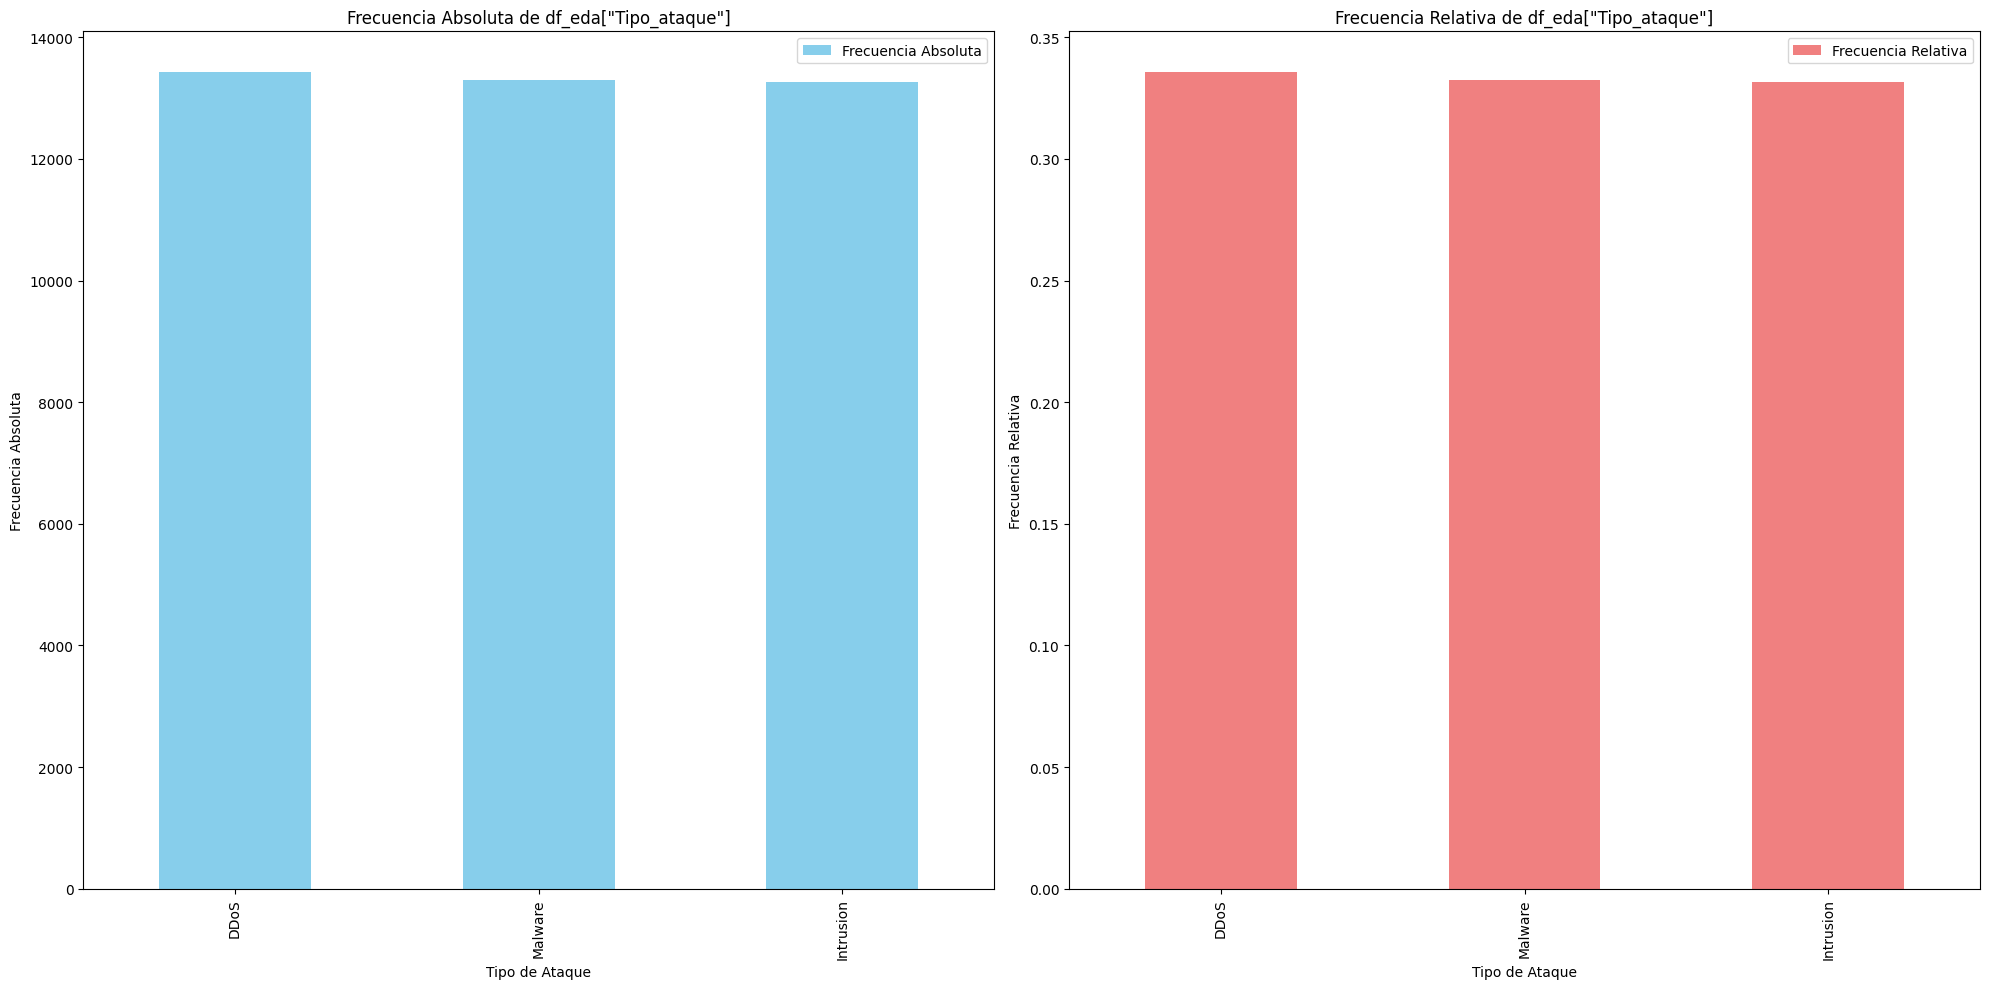

In [16]:
# Configuración de la figura
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))


# Gráfico 3: Frecuencia Absoluta de df_eda['Tipo_ataque']
ax3 = axes[0];
df_eda['Tipo_ataque'].value_counts().plot(kind='bar', ax=ax3, color='skyblue')
ax3.set_title('Frecuencia Absoluta de df_eda["Tipo_ataque"]')
ax3.set_xlabel('Tipo de Ataque')
ax3.set_ylabel('Frecuencia Absoluta')
ax3.legend(['Frecuencia Absoluta'])

# Gráfico 4: Frecuencia Relativa de df_eda['Tipo_ataque']
ax4 = axes[1]
df_eda['Tipo_ataque'].value_counts(normalize=True).plot(kind='bar', ax=ax4, color='lightcoral')
ax4.set_title('Frecuencia Relativa de df_eda["Tipo_ataque"]')
ax4.set_xlabel('Tipo de Ataque')
ax4.set_ylabel('Frecuencia Relativa');
ax4.legend(['Frecuencia Relativa']) 

# Ajustes de diseño de la figura
plt.tight_layout()
plt.show();


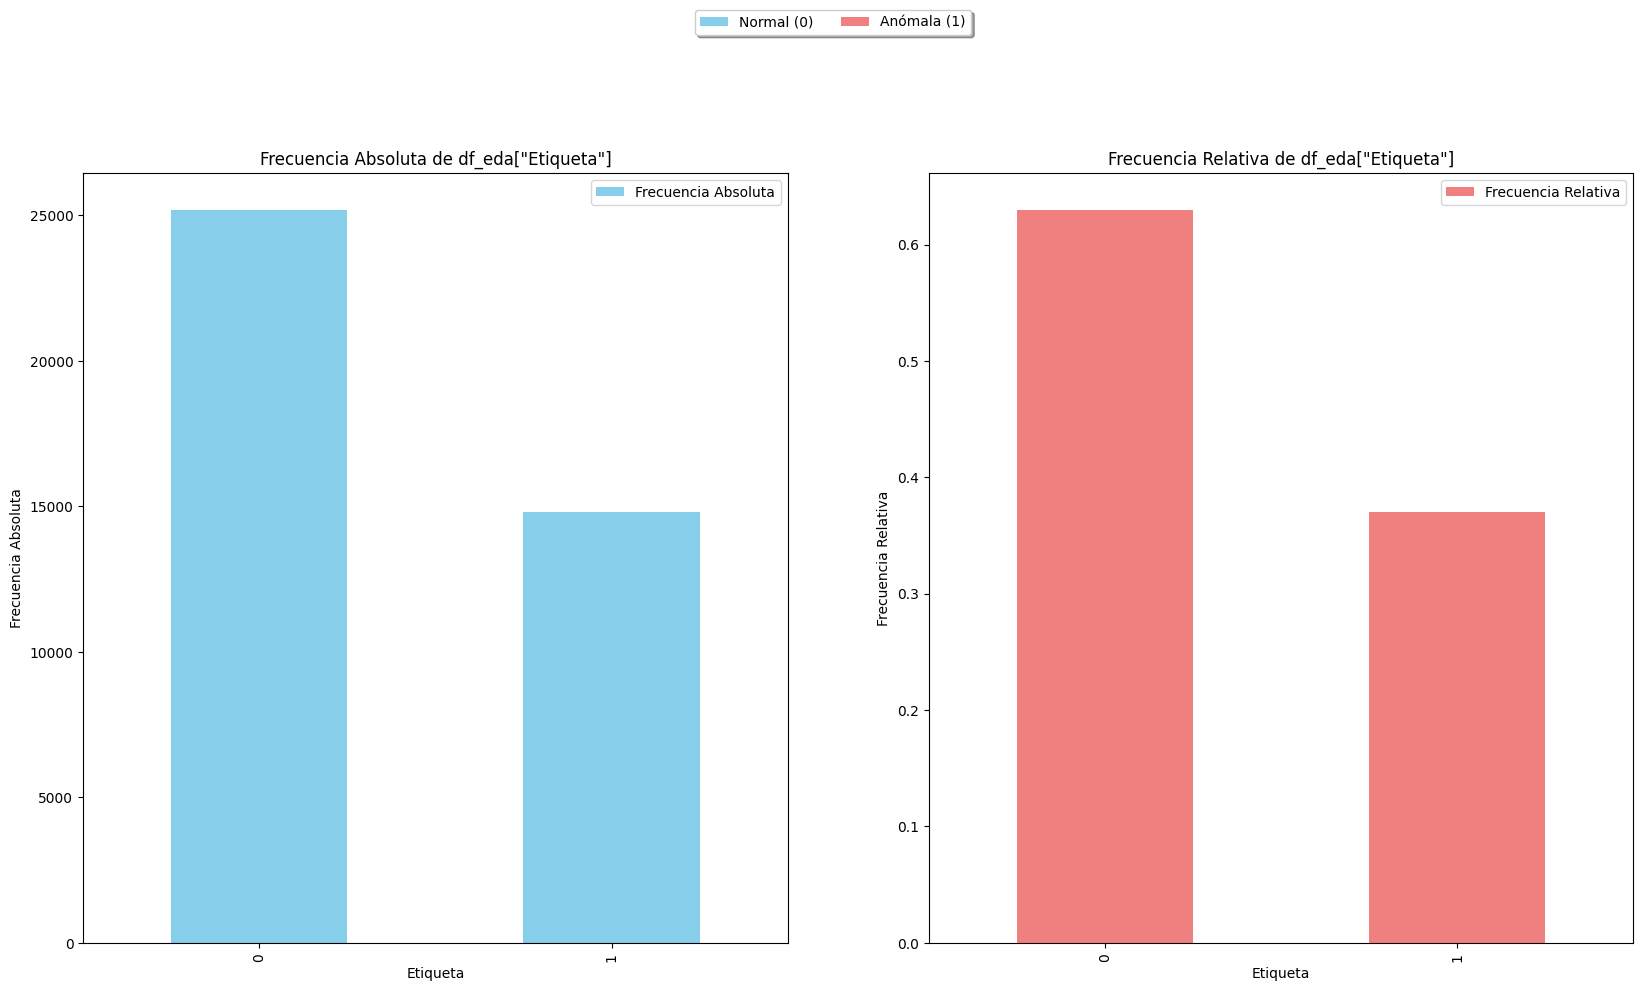

In [18]:
# Configuración de la figura
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
# Gráfico 5: Frecuencia Absoluta de df_eda['Etiqueta']
ax5 = axes[0];
df_eda['Etiqueta'].value_counts().plot(kind='bar', ax=ax5, color='skyblue')
ax5.set_title('Frecuencia Absoluta de df_eda["Etiqueta"]')
ax5.set_xlabel('Etiqueta')
ax5.set_ylabel('Frecuencia Absoluta')
ax5.legend(['Frecuencia Absoluta'])

# Gráfico 6: Frecuencia Relativa de df_eda['Etiqueta']
ax6 = axes[1];
df_eda['Etiqueta'].value_counts(normalize=True).plot(kind='bar', ax=ax6, color='lightcoral')
ax6.set_title('Frecuencia Relativa de df_eda["Etiqueta"]')
ax6.set_xlabel('Etiqueta')
ax6.set_ylabel('Frecuencia Relativa')
ax6.legend(['Frecuencia Relativa'])

# Leyenda explicativa general
fig.legend(['Normal (0)', 'Anómala (1)'], loc='upper center', bbox_to_anchor=(0.5, 1.05), fancybox=True, shadow=True, ncol=2)


In [19]:
df_lugares_origen.Ciudad.unique()

array(['Мольча, Чыркавіцкі сельскі Савет, Provincia de Gómel, Belarús',
       'Ucrania', 'Великоомелянська, Ucrania', 'Dhofar, Omán',
       'Здолбунівська, Ucrania',
       'Güneyce, Arsin, Trabzon, Región del Mar Negro, Turquía',
       'Орестів, Ucrania', 'Afder, Somali, Etiopía',
       'Шпанівська, Ucrania', 'Provincia de Ogooué-Lolo',
       'Provincia Oriental, Arabia Saudita',
       'Abu Dabi, Emiratos Árabes Unidos', 'Sanaag, Somalia', 'Yemen',
       'Sebastopol, Южный, Rusia',
       'Ферзиковский, Distrito federal Central, Rusia',
       'العين, Abu Dabi, Emiratos Árabes Unidos',
       'Provincia de Hail, Arabia Saudita', 'Siria', 'Omán',
       'Шпанів, Шпанівська, Ucrania',
       'Aşkale, Erzurum, Doğu Anadolu Bölgesi, Turquía',
       'Мірашнічэнкі, Печышчы, Сасноваборскі, Provincia de Gómel, Belarús',
       'Chipre del Norte, Chipre',
       'محافظة شروره, Provincia de Najrán, Arabia Saudita',
       'Provincia de Tabuk, Arabia Saudita', 'Buraimi, Omán',
       'Ля

FILTRO LAS CIUDADES POR PAISES

In [20]:
df_pais = pd.read_excel("E:\Cursos\BC_Data_Science\Repositorio\ONLINE_DS_THEBRIDGE_V_NEW\proyecto EDA\DATASETS\EXCEL\paises_geo_lugares_origen_final.xlsx")

In [41]:
df_pais

,Pais
0,Belarus
1,Ukraine
2,Turkey
3,Oman
4,Saudi Arabia
5,Russia
6,Somalia
7,Ethiopia
8,Yemen
9,United Arab Emirates


In [22]:
# Crea un nuevo dataframe con las columnas de ambos dataframes
#df_lugares_origen_new = pd.concat([df_lugares_origen, df_pais], axis=1)

In [23]:
df_lugares_origen

,Longitud,Latitud,Info_Lugar,Ciudad,Pais
0,29.555740,52.658705,"83, Цэнтральная вуліца, Мольча, Чыркавіцкі сел...","Мольча, Чыркавіцкі сельскі Савет, Provincia de...",Belarus
1,35.554545,45.445429,"República Autónoma de Crimea, Ucrania",Ucrania,Turkey
2,26.230098,50.573701,"Великоомелянська сільська громада, Рівненський...","Великоомелянська, Ucrania",Oman
3,26.190156,50.545351,"Ільпінь, Здолбунівська міська громада, Рівненс...",Ucrania,Saudi Arabia
4,53.100078,17.903919,"Dhofar, Omán","Dhofar, Omán",Somalia
...,...,...,...,...,...
498,NaN,NaN,NaN,NaN,Russia
499,NaN,NaN,NaN,NaN,Ethiopia
500,NaN,NaN,NaN,NaN,United Arab Emirates
501,NaN,NaN,NaN,NaN,Syria


In [77]:
df_lugares_origen_new.to_excel(r"E:\Cursos\BC_Data_Science\Repositorio\ONLINE_DS_THEBRIDGE_V_NEW\proyecto EDA\DATASETS\EXCEL\geo_lugares_origen_final.xlsx", index=False)

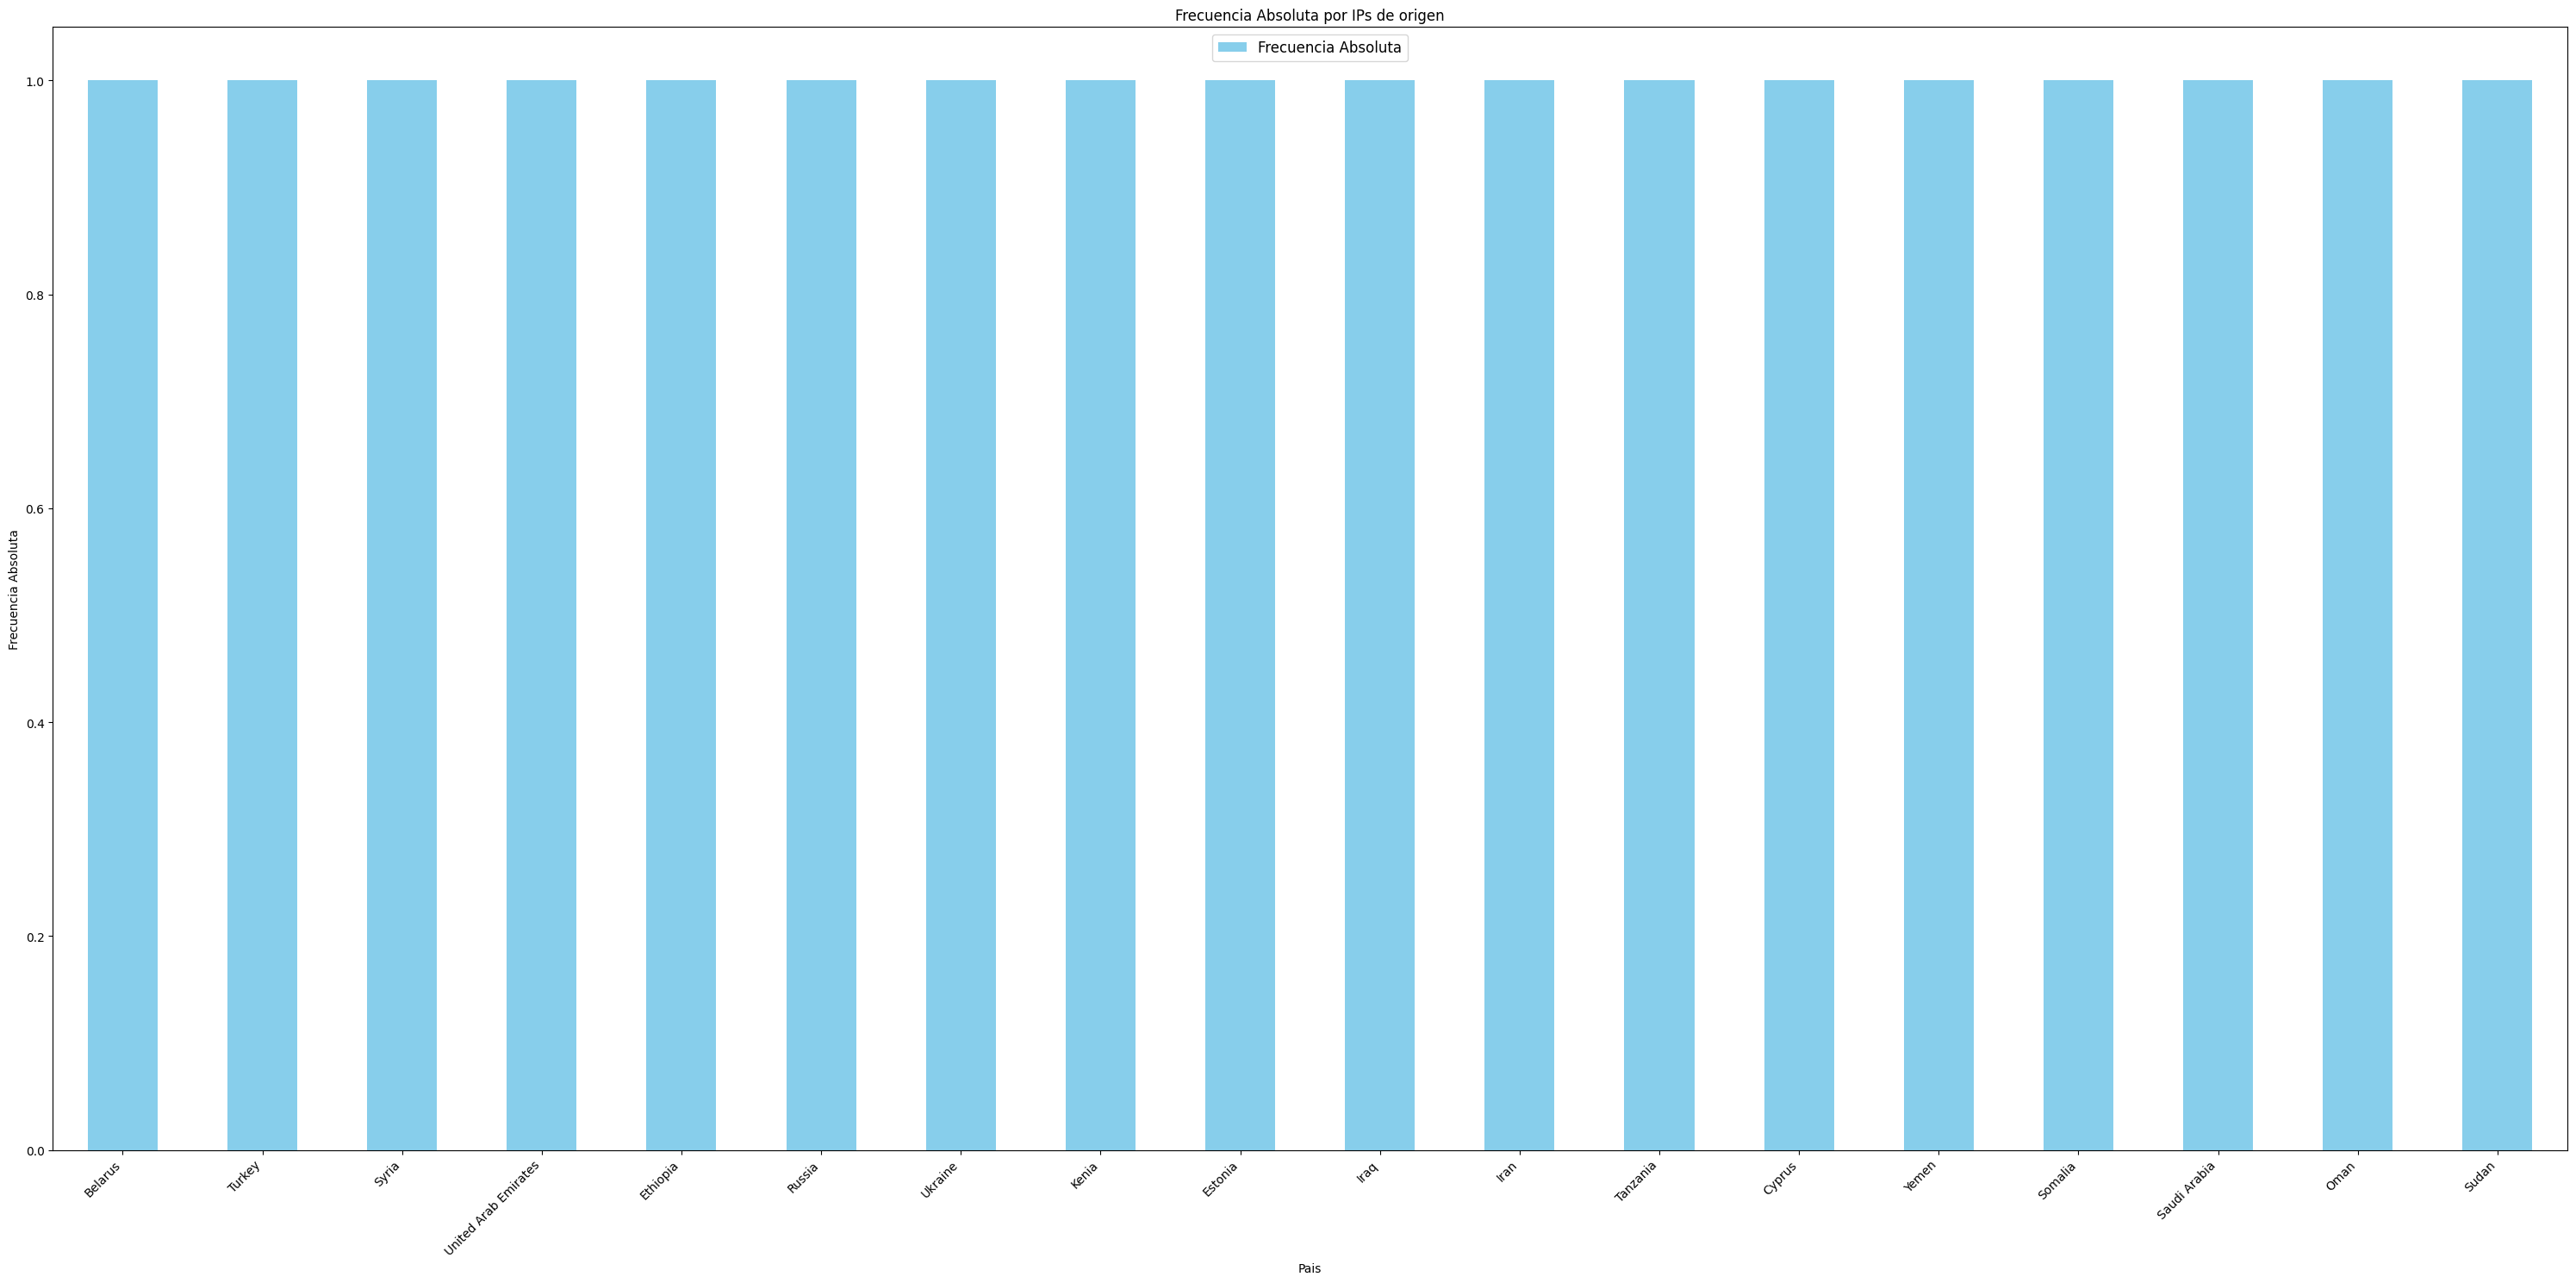

In [25]:
# Configuración de la figura para el Gráfico 1
fig1, ax1 = plt.subplots(figsize=(30, 15))

# Gráfico 1: Frecuencia Absoluta de df_lugares_origen
df_lugares_origen['Pais'].value_counts().plot(kind='bar', ax=ax1, color='skyblue');
ax1.set_title('Frecuencia Absoluta por IPs de origen')
ax1.set_xlabel('Pais')
ax1.set_ylabel('Frecuencia Absoluta');

# Inclinar etiquetas del eje x hacia la derecha
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right');

# Leyenda explicativa
legend_labels = ['Frecuencia Absoluta']
ax1.legend(legend_labels, loc='upper center', fontsize='large')

# Ajustes de diseño de la figura
plt.tight_layout()
plt.show()



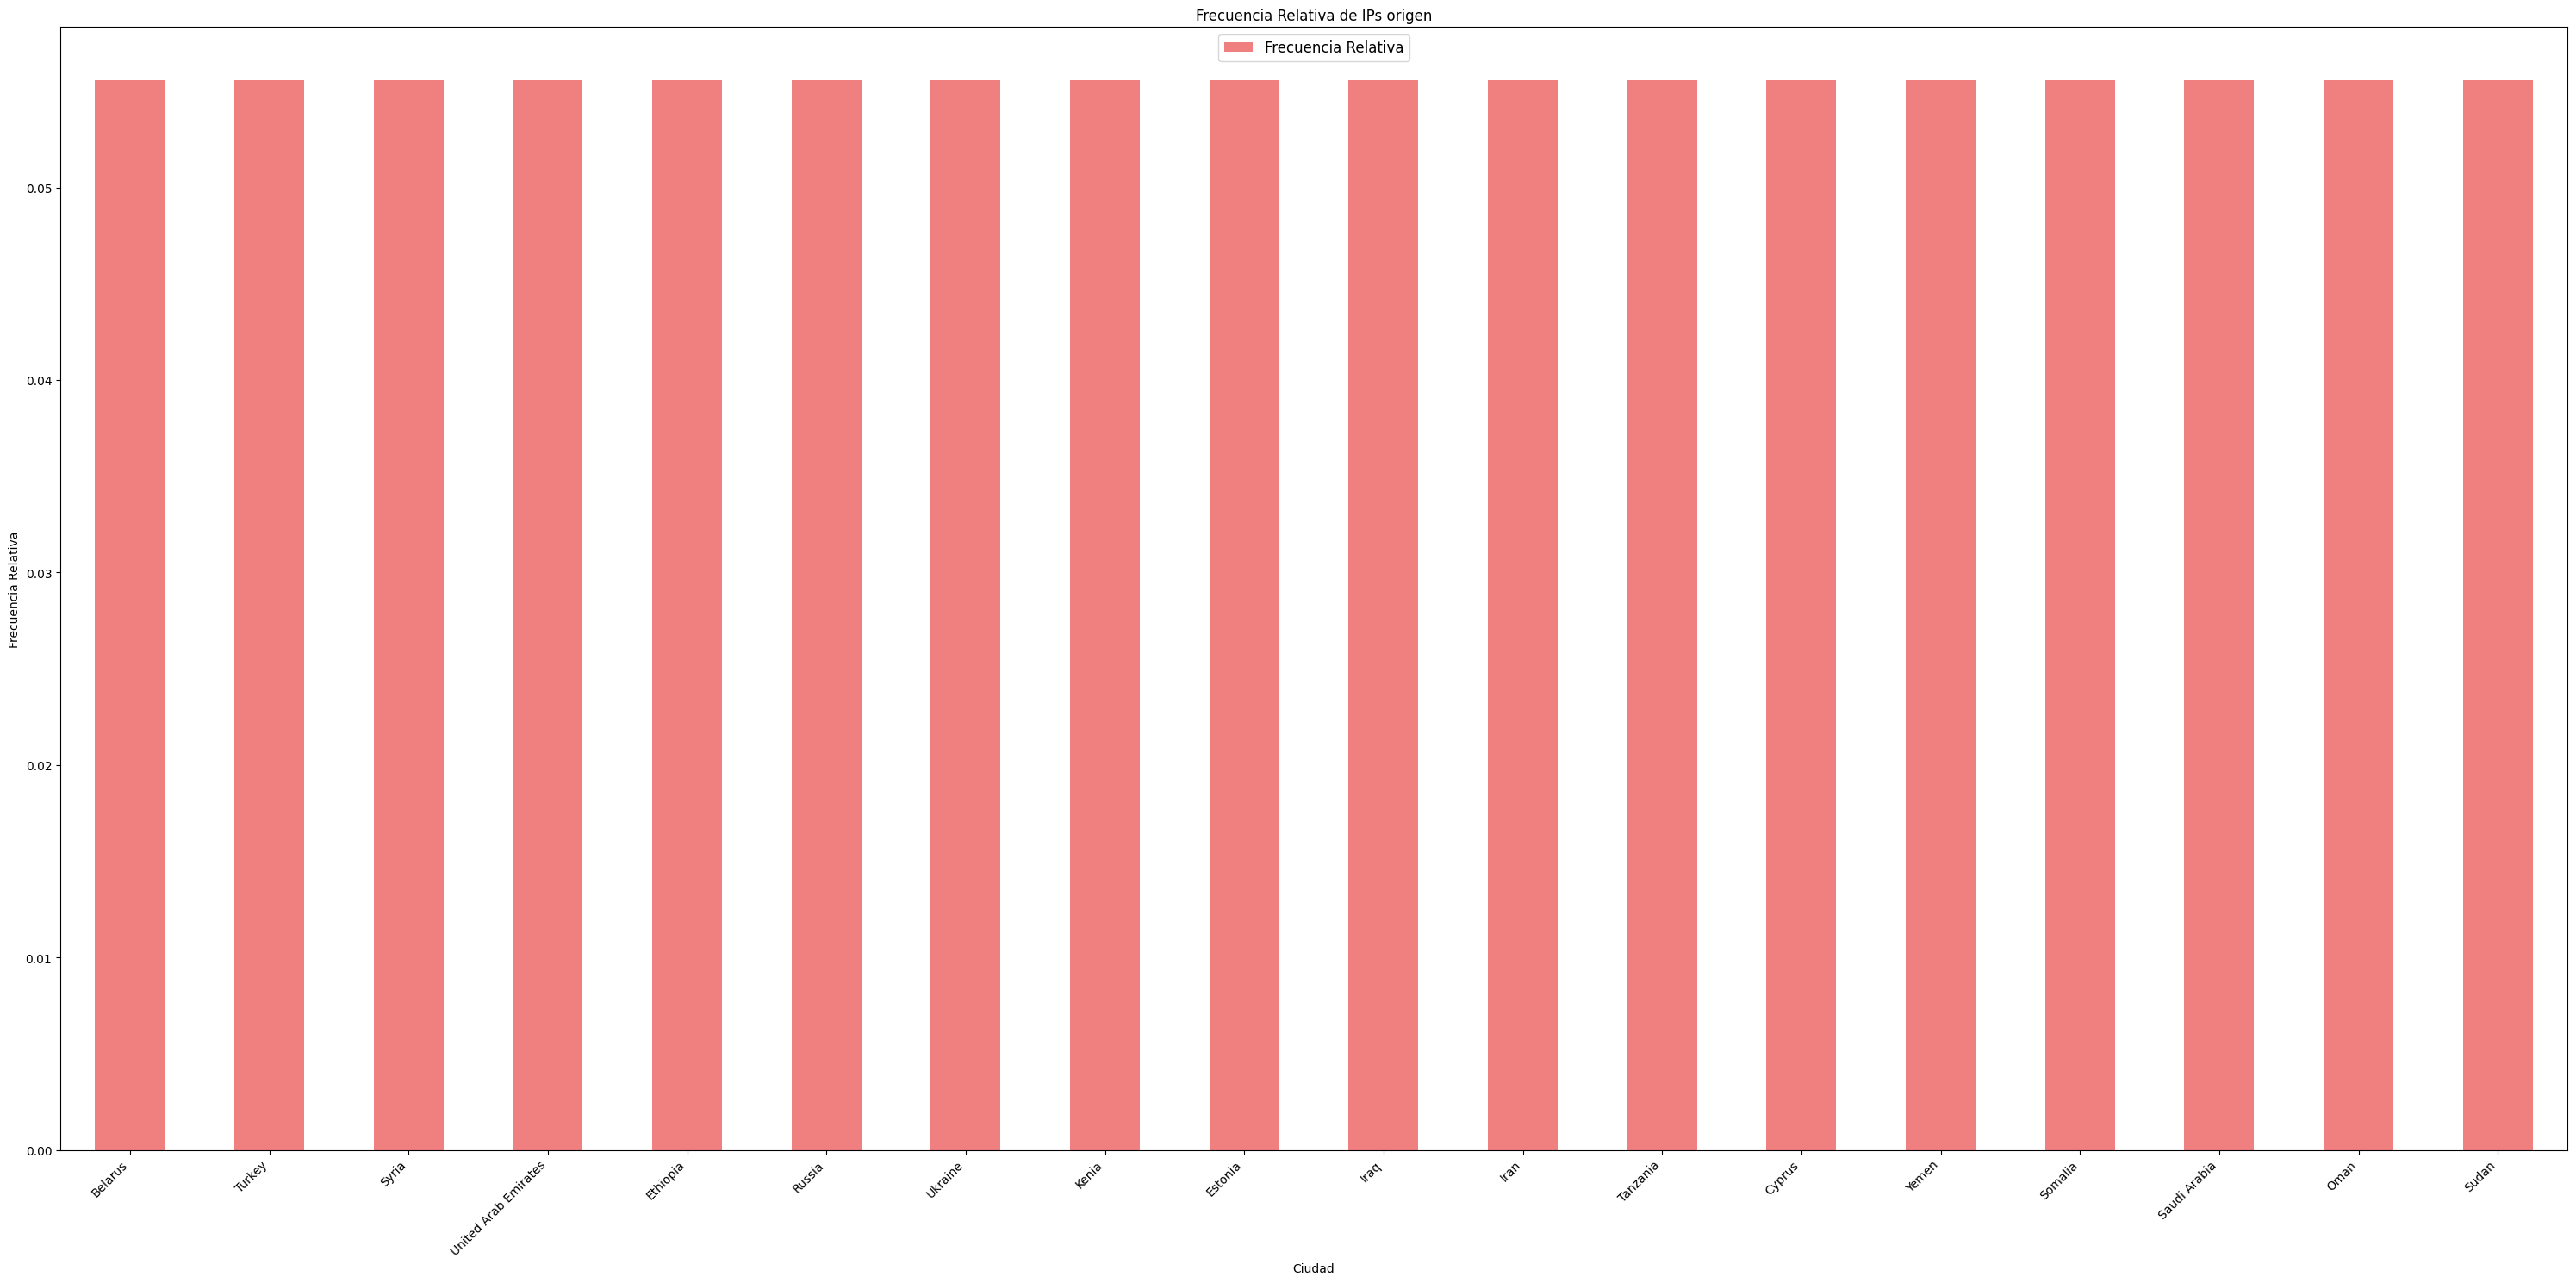

In [26]:
# Configuración de la figura para el Gráfico 2
fig2, ax2 = plt.subplots(figsize=(30, 15))

# Gráfico 2: Frecuencia Relativa de df_lugares_origen
df_lugares_origen['Pais'].value_counts(normalize=True).plot(kind='bar', ax=ax2, color='lightcoral')
ax2.set_title('Frecuencia Relativa de IPs origen')
ax2.set_xlabel('Ciudad')
ax2.set_ylabel('Frecuencia Relativa')

# Inclinar etiquetas del eje x hacia la derecha
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')

# Leyenda explicativa
legend_labels = ['Frecuencia Relativa']
ax2.legend(legend_labels, loc='upper center', fontsize='large')

# Ajustes de diseño de la figura
plt.tight_layout()
plt.show()

In [56]:
df_eda.head(1)

,Anyo,Fecha,Hora,Hora_entera,Intervalo,IP Origen,Destino IP,Datos_geolocalizacion,Tipo_ataque,Nivel_severidad,Datos_carga_util,Resultado_analisis,Cluster,Etiqueta,Indicadores_malware,Puntuaciones_anomalias,Informacion_usuario,Informacion_dispositivo
0,2023,2023-05-30,2023-12-25 06:33:58,6,6-9,103.216.15.12,84.9.164.252,"Jamshedpur, Sikkim",Malware,Low,Qui natus odio asperiores nam. Optio nobis ius...,"{'entidades': [], 'partes_del_discurso': ['PRO...",0.067699,anómala,IoC Detected,2867,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...


#### CONVERTIMOS LA ETIQUETA_X EN BINARIA NUMERIA, ASIGNADOLE 1 Y 0 , CREANDO OTRA COLUMNA CON LOS TIPOS DONDE PODREMOS ANOMALA O NORMAL

In [64]:
df_final = pd.read_excel(r"E:\Cursos\BC_Data_Science\Repositorio\ONLINE_DS_THEBRIDGE_V_NEW\proyecto EDA\DATASETS\DATASETS MODIFICADOS\df_modificado_final_eda.xlsx")

In [65]:
df_final.head(1)

,Anyo,Fecha,Hora,Hora_entera,Intervalo,IP Origen,Destino IP,Datos_geolocalizacion,Tipo_ataque,Nivel_severidad,Datos_carga_util,Resultado_analisis,Cluster,Etiqueta,Indicadores_malware,Puntuaciones_anomalias,Informacion_usuario,Informacion_dispositivo
0,2023,2023-05-30,2023-12-25 06:33:58,6,6-9,103.216.15.12,84.9.164.252,"Jamshedpur, Sikkim",Malware,Low,Qui natus odio asperiores nam. Optio nobis ius...,"{'entidades': [], 'partes_del_discurso': ['PRO...",0.067699,anómala,IoC Detected,2867,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...


In [66]:
# Reemplazar 'anómala' con 1 y 'normal' con 0 en la columna 'Etiqueta'
df_final['Etiqueta'] = df_final['Etiqueta'].replace({'normal': 0, 'anómala': 1})

# Crear la nueva columna 'Tipo_etiqueta'
df_final['Tipo_etiqueta'] = df_final['Etiqueta'].map({1: 'anómala', 0: 'normal'})

df_final.head(1)

,Anyo,Fecha,Hora,Hora_entera,Intervalo,IP Origen,Destino IP,Datos_geolocalizacion,Tipo_ataque,Nivel_severidad,Datos_carga_util,Resultado_analisis,Cluster,Etiqueta,Indicadores_malware,Puntuaciones_anomalias,Informacion_usuario,Informacion_dispositivo,Tipo_etiqueta
0,2023,2023-05-30,2023-12-25 06:33:58,6,6-9,103.216.15.12,84.9.164.252,"Jamshedpur, Sikkim",Malware,Low,Qui natus odio asperiores nam. Optio nobis ius...,"{'entidades': [], 'partes_del_discurso': ['PRO...",0.067699,1,IoC Detected,2867,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,anómala


In [68]:
df_final.to_excel(r"E:\Cursos\BC_Data_Science\Repositorio\ONLINE_DS_THEBRIDGE_V_NEW\proyecto EDA\DATASETS\DATASETS MODIFICADOS\df_modificado_final_eda.xlsx", index= False)

# PINTAMOS EL MAPA CON FOLIUM

In [78]:
df_lugares_origen= pd.read_excel(R"E:\Cursos\BC_Data_Science\Repositorio\ONLINE_DS_THEBRIDGE_V_NEW\proyecto EDA\DATASETS\EXCEL\geo_lugares_origen_final.xlsx")

In [27]:
df_lugares_origen

,Longitud,Latitud,Info_Lugar,Ciudad,Pais
0,29.555740,52.658705,"83, Цэнтральная вуліца, Мольча, Чыркавіцкі сел...","Мольча, Чыркавіцкі сельскі Савет, Provincia de...",Belarus
1,35.554545,45.445429,"República Autónoma de Crimea, Ucrania",Ucrania,Turkey
2,26.230098,50.573701,"Великоомелянська сільська громада, Рівненський...","Великоомелянська, Ucrania",Oman
3,26.190156,50.545351,"Ільпінь, Здолбунівська міська громада, Рівненс...",Ucrania,Saudi Arabia
4,53.100078,17.903919,"Dhofar, Omán","Dhofar, Omán",Somalia
...,...,...,...,...,...
498,NaN,NaN,NaN,NaN,Russia
499,NaN,NaN,NaN,NaN,Ethiopia
500,NaN,NaN,NaN,NaN,United Arab Emirates
501,NaN,NaN,NaN,NaN,Syria


#### MAPA SIN ZONAS DE CALOR IPS ORIGEN, LAS QUE SON REALMENTE VALODAD TRAS FILTRADO DE ZONAS AGUA Y ZONAS NO LOCALIZABLES


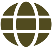
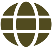
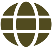
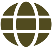
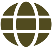
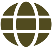
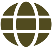
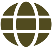
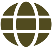
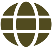
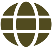
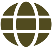
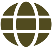
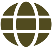
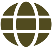
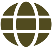
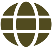
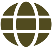
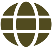
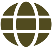
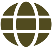
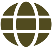
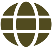
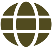
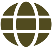
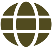
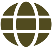
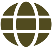
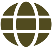
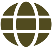
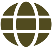
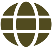
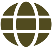
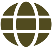
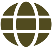
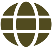
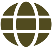
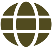
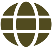
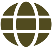
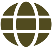
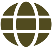
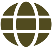
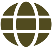
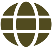
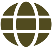
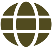
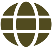
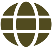
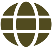
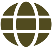
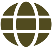
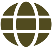
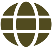
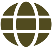
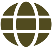
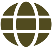
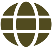
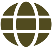
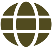
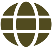
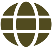
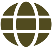
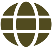
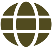
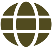
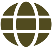
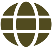
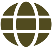
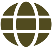
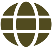
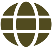
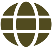
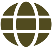
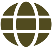
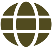
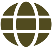
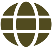
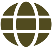
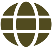
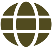
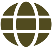
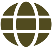
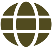
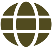
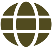
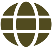
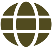
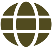
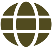
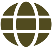
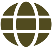
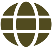
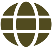
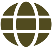
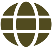
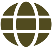
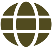
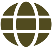
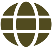
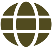
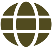
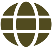
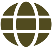
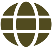
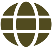
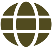
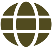
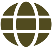
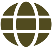
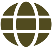
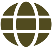
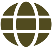
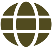
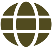
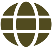
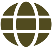
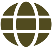
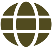
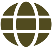
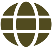
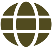
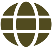
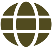
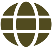
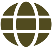
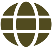
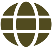
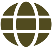
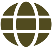
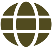
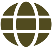
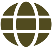
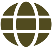
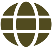
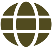
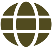
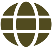
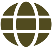
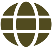
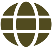
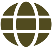
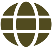
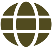
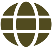
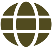
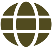
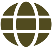
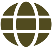
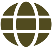
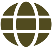
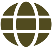
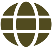
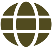
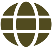
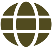
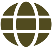
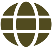
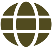
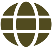
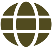
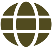
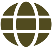
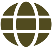
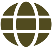
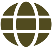
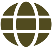
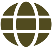
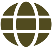
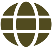
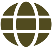
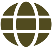
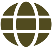
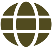
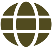
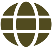
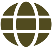
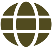
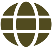
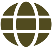
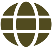
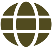
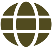
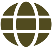
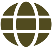
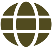
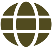
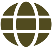
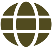
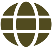
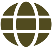
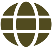
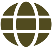
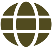
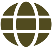
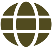
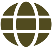
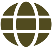
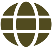
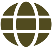
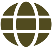
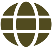
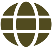
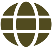
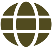
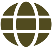
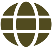
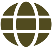
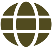
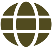
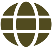
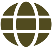
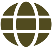
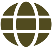
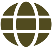
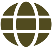
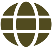
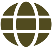
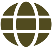
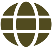
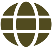
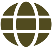
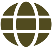
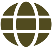
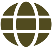
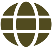
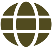
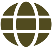
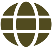
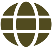
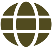
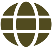
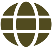
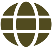
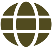
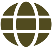
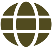
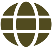
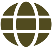
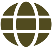
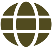
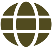
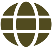
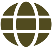
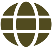
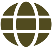
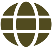
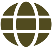
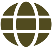
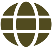
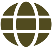
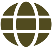
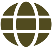
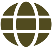
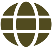
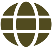
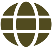
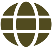
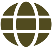
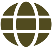
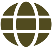
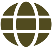
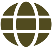
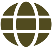
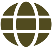
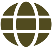
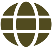
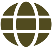
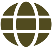
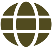
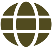
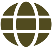
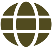
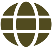
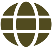
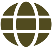
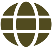
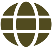
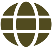
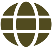
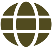
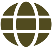
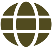
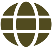
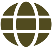
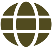
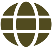
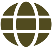
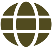
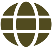
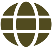
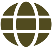
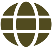
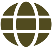
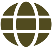
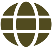
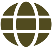
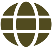
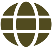
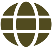
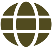
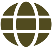
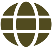
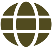
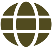
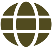
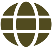
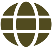
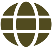
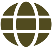
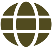
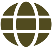
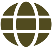
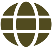
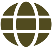
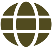
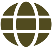
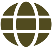
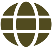
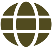
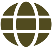
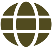
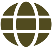
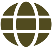
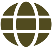
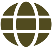
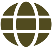
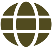
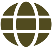
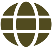
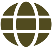
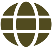
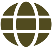
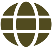
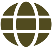
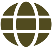
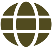
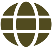
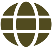
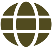
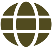
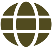
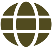
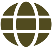
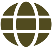
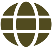
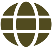
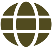
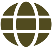
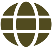
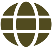
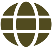
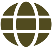
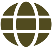
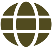
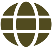
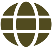
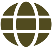
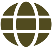
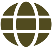
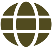
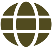
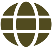
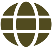
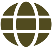
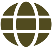
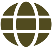
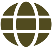
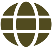
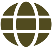
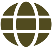
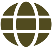
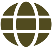
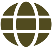
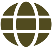
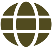
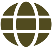
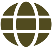
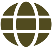
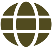
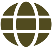
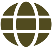
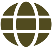
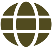
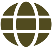
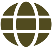
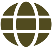
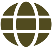
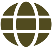
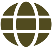
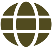
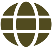
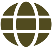
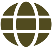
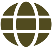
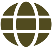
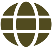
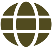
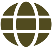
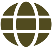
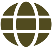
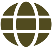
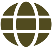
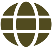
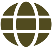
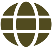
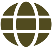
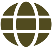
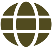
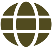
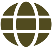
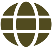
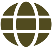
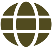
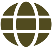
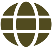
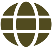
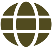
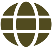
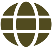
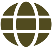
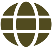
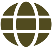
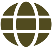
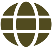
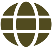
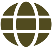
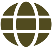
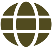
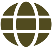
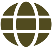
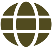
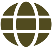
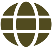
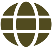
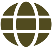
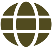
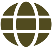
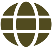
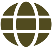
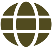
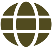
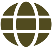
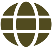
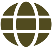
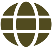
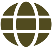
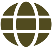
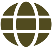
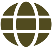
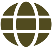
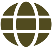
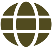
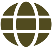
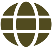
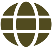
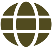
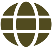
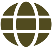
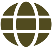
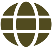
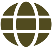
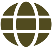
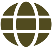
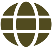
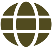
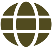
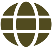
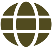
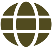
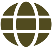
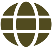
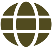
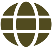
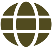
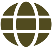
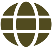
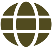
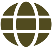
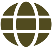
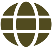
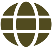
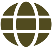
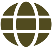
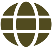
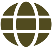
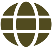
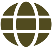
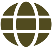
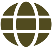
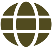
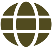
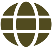
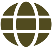
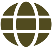
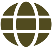
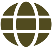

In [28]:


# Filtrar el DataFrame para quedarse solo con las filas que tienen información de geolocalización
df_lugares_filtrado = df_lugares_origen[['Longitud', 'Latitud', 'Info_Lugar', 'Ciudad',"Pais"]].dropna(subset=['Longitud', 'Latitud'])

# Convertir las columnas de longitud y latitud a una lista de ubicaciones
lista_origen = df_lugares_filtrado[['Longitud', 'Latitud', 'Ciudad',"Pais"]].values.tolist()

# Convertir cualquier valor no numérico en las columnas de longitud y latitud a NaN
for i, tupla in enumerate(lista_origen):
    for j, valor in enumerate(tupla[:2]):
        if not isinstance(valor, (int, float)):
            lista_origen[i][j] = np.nan

# Eliminar las filas que aún contienen valores no numéricos
lista_origen = [tupla for tupla in lista_origen if not any(np.isnan(tupla[:2]))]


# Crear un objeto de mapa centrado en la primera ubicación
mapa = folium.Map(location=lista_origen[0][:2], zoom_start=10)

# Agregar un grupo de marcadores
marker_cluster = MarkerCluster().add_to(mapa)

# Agregar marcadores al grupo con iconos personalizados
for tupla in lista_origen:
    # Cargar el ícono personalizado
    icono_personalizado = folium.CustomIcon(icon_image=r'C:\Users\victo\Pictures\internet_icon.png', icon_size=(30, 30))
    
    # Agregar el marcador con el icono personalizado
    folium.Marker(location=tupla[:2], popup=tupla[2], icon=icono_personalizado).add_to(marker_cluster)


# Guardar el mapa como un archivo HTML
#mapa.save('E:\Cursos\BC_Data_Science\Repositorio\ONLINE_DS_THEBRIDGE_V_NEW\proyecto EDA\mapa_geolocalizado_ips_origen_final.html')

# Mostrar el mapa en la notebook
display(mapa)



##### MAPA IPS ORIGEN CO ZAONA DE CALOR

In [29]:



# Filtrar el DataFrame para quedarse solo con las filas que tienen información de geolocalización
df_lugares_filtrado = df_lugares_origen[['Longitud', 'Latitud', 'Info_Lugar', 'Ciudad', "Pais"]].dropna(subset=['Longitud', 'Latitud'])

# Convertir las columnas de longitud y latitud a una lista de ubicaciones
lista_origen = df_lugares_filtrado[['Latitud', 'Longitud']].values.tolist()

# Crear un objeto de mapa centrado en la primera ubicación
mapa = folium.Map(location=lista_origen[0][::-1], zoom_start=10)# Nota: Se invierte el orden para folium (lat, lon)

# Agregar un grupo de marcadores
marker_cluster = MarkerCluster().add_to(mapa)


# Agregar un mapa de calor
HeatMap(lista_origen).add_to(mapa)

# Guardar el mapa como un archivo HTML
#mapa.save('E:\Cursos\BC_Data_Science\Repositorio\ONLINE_DS_THEBRIDGE_V\proyecto EDA\mapa_geolocalizado_ips_origen_final_con calor.html')

# Mostrar el mapa en la notebook
display(mapa)

